Pymaceuticals

Observations and Insights

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "./Mouse_metadata.csv"
study_results_path = "./Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_study_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_study_data.head()

# Display the data table for preview

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_count = len(combined_study_data['Mouse ID'].unique())
mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_id = combined_study_data.loc[combined_study_data.duplicated(subset=["Mouse ID", "Timepoint"]),
                                            "Mouse ID"].unique()
duplicate_mice_id


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = combined_study_data.loc[combined_study_data["Mouse ID"] == "g989", :]
duplicate_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = combined_study_data[combined_study_data["Mouse ID"].isin(duplicate_mice_id)==False]
clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame
mice_total = len(clean_mouse_df["Mouse ID"].unique())
mice_total

248

Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen = clean_mouse_df["Drug Regimen"].unique()
drug_regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_group = clean_mouse_df.groupby(["Drug Regimen"])
drug_group.count()
drug_group_avg = drug_group["Tumor Volume (mm3)"].mean()
drug_group_avg
drug_group_med = drug_group["Tumor Volume (mm3)"].median()
drug_group_med
drug_group_var = drug_group["Tumor Volume (mm3)"].var()
drug_group_var
drug_group_std = drug_group["Tumor Volume (mm3)"].std()
drug_group_std
drug_group_sem = drug_group["Tumor Volume (mm3)"].sem()
drug_group_sem

#Create dataframe of statistics
drug_df = pd.DataFrame({
                       "Mean Tumor Volume": drug_group_avg,
                       "Median Tumor Volume": drug_group_med,
                       "Tumor Volume Variance": drug_group_var,
                       "Tumor Volume Std. Dev": drug_group_std,
                       "Tumor Volume Std. Err": drug_group_sem,
                        })
drug_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_mouse = clean_mouse_df.groupby("Drug Regimen")

agg_mouse_df = agg_mouse.aggregate(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
agg_mouse_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Bar and Pie Charts

Text(0, 0.5, 'Total Measurements')

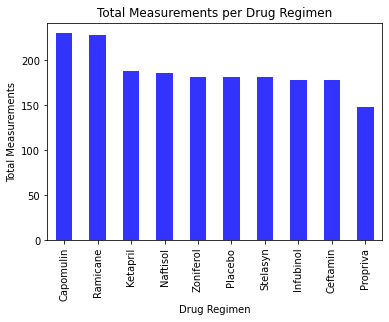

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_measure = clean_mouse_df["Drug Regimen"].value_counts()
drug_measure
# Create bar chart
drug_measure.plot(kind = "bar", color = "blue", alpha = 0.8, align ="center")

# Add labels and title
plt.title("Total Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Measurements")


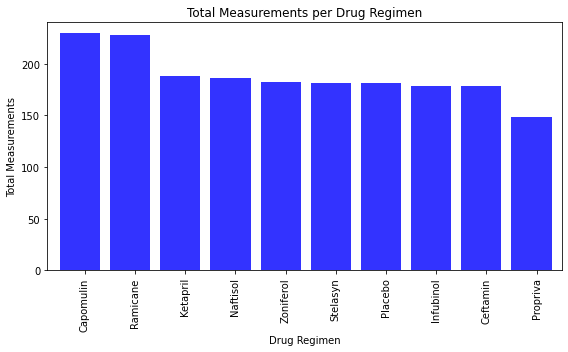

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_regimen = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", 
                "Stelasyn", "Placebo", "Infubinol", "Ceftamin", "Propriva"]
drug_regimen
drug_types = clean_mouse_df["Drug Regimen"].value_counts()
# Create x-axis and tick locations
x_axis = np.arange(len(drug_types))
tick_locations = [value+0.5 for value in x_axis]

# Create bar chart
plt.figure(figsize=(8,5))
plt.bar(x_axis, drug_types, color='blue', alpha=0.8, align="edge")
plt.xticks(tick_locations, drug_regimen, rotation="vertical")

# Set x and y limits
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(drug_types)+10)

# Create title and labels
plt.title("Total Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Measurements")
plt.tight_layout()
plt.show()


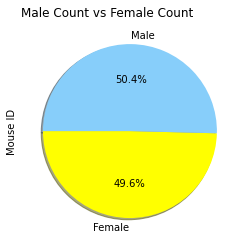

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using panda
# Find gender totals
gender_count = clean_mouse_df.groupby("Sex").nunique()["Mouse ID"]
gender_count

# Create pie chart
gender_count.plot(kind = "pie", shadow = True, startangle = 180, 
            colors= ["yellow", "lightskyblue"], autopct='%.1f%%')
plt.title("Male Count vs Female Count", loc = "left")
plt.show()

Text(0.0, 1.0, 'Male Count vs Female Count')

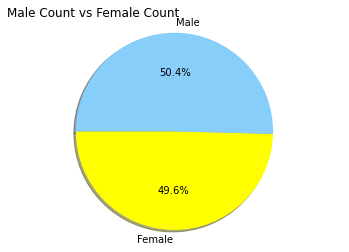

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_py = clean_mouse_df.groupby("Sex").nunique()["Mouse ID"]
labels = ["Female", "Male"]
colors = ["yellow", "lightskyblue"]

# Create pie chart with matplotlib
plt.pie(gender_py, labels = labels, colors = colors,
       autopct="%1.1f%%", shadow = True, startangle = 180)
plt.axis("equal")
plt.title("Male Count vs Female Count", loc = "left")


Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_mouse = clean_mouse_df[clean_mouse_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
last_mouse = last_mouse.sort_values(["Timepoint"], ascending = True)
last_mouse_df = pd.DataFrame(last_mouse[["Drug Regimen", "Mouse ID", "Tumor Volume (mm3)"]])
last_mouse_df.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_mouse_df = pd.DataFrame(last_mouse[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]])
last_mouse_df.reset_index()

,index,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,0,Ramicane,k403,0,45.000000
1,1391,Infubinol,q132,0,45.000000
2,195,Capomulin,i738,0,45.000000
3,205,Ramicane,a520,0,45.000000
4,1370,Ceftamin,p438,0,45.000000
...,...,...,...,...,...
809,350,Capomulin,v923,45,40.658124
810,144,Capomulin,m957,45,33.329098
811,337,Capomulin,j119,45,38.125164
812,59,Ramicane,s508,45,30.276232


In [23]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    top_4_df = last_mouse_df.loc[last_mouse_df["Drug Regimen"] == treatment]
    tumor_vol.append(top_4_df)
    tumor_vol
    tumor_size = top_4_df['Tumor Volume (mm3)']
    tumor_size

    # add subset 

    # Determine outliers using upper and lower bounds
    
    quartiles = tumor_size.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {treatment}: {iqr}')

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {treatment}: {lower_bound}')
    print(f'Upper Bound for {treatment}: {upper_bound}')

    outliers_count = (tumor_size.loc[(top_4_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                 (top_4_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {treatment} outliers: {outliers_count}')



IQR for Capomulin: 7.314067135000002
Lower Bound for Capomulin: 26.714832162499995
Upper Bound for Capomulin: 55.9711007025
Number of Capomulin outliers: 2
IQR for Ramicane: 8.325365415
Lower Bound for Ramicane: 24.1865864625
Upper Bound for Ramicane: 57.488048122500004
Number of Ramicane outliers: 1
IQR for Infubinol: 10.002090667500006
Lower Bound for Infubinol: 32.309217298749985
Upper Bound for Infubinol: 72.31757996875001
Number of Infubinol outliers: 0
IQR for Ceftamin: 9.593010457500007
Lower Bound for Ceftamin: 32.81891142624998
Upper Bound for Ceftamin: 71.19095325625001
Number of Ceftamin outliers: 0


<ipython-input-27-5a2bd335672d>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(treatments)


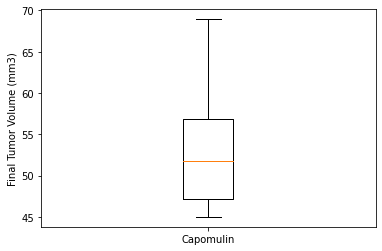

In [27]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig, ax1 = plt.subplots()
ax1.set_xticklabels(treatments)
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_size)
plt.show()

Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
